# **Tarea 2: Clasificador SVM**

**Nombre**: José Luis Cádiz Sejas

**ReadMe**: Para el correcto funcionamiento del código, se debe ejecutar todo el código, ya que existen algunas variables que se van sobreescribiendo.

# **Introducción:**

En el contexto del curso ''**Inteligencia Computacional**'', se presentará a continuación el desarrollo de la ''**Tarea 2**'' del curso. Esta tarea pretende implementar un **Clasificador SVM**  para distinguir entre rayos gamma primarios v/s hadrones, programando en lenguaje ''**Python**'' y utlizando sus librerías (pandas, numpy, matplotlib y **scikit-learn**).

A continuación se explica a grandes razgos lo que se realizara en en la tarea: En la parte 1 se implementará un código para leer el dataset. Luego, en la parte 2 se re-muestreará el dataset en un conjunto de 3000 ejemplos de clase positiva y 3000 ejemplos de clase negativa. En la parte 3, se dividirá el conjunto en 3 partes; conjunto de entrenamiento, conjunto de validación y conjunto de prueba, verificando que las proporciones de clases se mantengan respecto del conjunto original.

A partir de la parte 4, se empieza a trabajar con la libreria **scikit-learn**, en donde se entrena **StandardScaler** usando las características del conjunto de entrenamiento para poder normalizar al conjunto de validación y de prueba. En la parte 5 se Entrenar un clasificador SVM lineal, para luego en la parte 6 evaluar sobre el conjunto de validación y generar la matriz de confusión.

En la parte 7 y 8 se generan las curvas ROC y precisión-recall junto con sus respectivas metricas de desempeño.

En la parte 9 y 10 se repetiran los pasos 5, 6, 7 y 8 para el caso de clasificadores SVM con kernel polinominal y RBF respectivamente. 

Posteriomente, en la parte 11, se Evaluará el mejor clasificador obtenido sobre el conjunto de prueba, reportando las métricas indicadas 
en las partes 6, 7 y 8. 

Finalmente, se termina el documento con las conclusiones principales de esta experiencia.

# **Desarrollo:**

In [ ]:
#Importando librerias:
#import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#import seaborn as sb

#Libreria sklearn:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
confuns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

**1)** Implementar un código que lea el dataset, usando pandas:

In [ ]:
#Se define la ubicación de los datos:
path = 'magic04.data'  #Para la revisión solo cambiar la dirección del path
#path='magic04.data'
#Lectura de datos sin cabecera:
datos=pd.read_csv(path,header=None)
print("Datos sin cabecera")
print(datos)
#Se agrega nombre a las columnas de las features:
datos.set_axis(['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'], axis=1, inplace=True)
#Se muestran los datos con cabecera:
print("Datos con cabecera")
print(datos)
#Verficiando dimensión de los datos y sus tipos:
print("Dimensión y tipos")
print(len(datos))
print(datos.dtypes)
#Primeros elementos del DataFrame:
datos.head()

Datos sin cabecera
             0         1       2       3   ...       7        8         9   10
0       28.7967   16.0021  2.6449  0.3918  ...  -8.2027  40.0920   81.8828   g
1       31.6036   11.7235  2.5185  0.5303  ...  -9.9574   6.3609  205.2610   g
2      162.0520  136.0310  4.0612  0.0374  ... -45.2160  76.9600  256.7880   g
3       23.8172    9.5728  2.3385  0.6147  ...  -7.1513  10.4490  116.7370   g
4       75.1362   30.9205  3.1611  0.3168  ...  21.8393   4.6480  356.4620   g
...         ...       ...     ...     ...  ...      ...      ...       ...  ..
19015   21.3846   10.9170  2.6161  0.5857  ...   2.8766   2.4229  106.8258   h
19016   28.9452    6.7020  2.2672  0.5351  ...  -2.9632  86.7975  247.4560   h
19017   75.4455   47.5305  3.4483  0.1417  ...  -9.4662  30.2987  256.5166   h
19018  120.5135   76.9018  3.9939  0.0944  ... -63.8389  84.6874  408.3166   h
19019  187.1814   53.0014  3.2093  0.2876  ...  31.4755  52.7310  272.3174   h

[19020 rows x 11 columns]
Datos 

,fLength,fwidth,fSize,fConc,fconc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


**2)** Re-muestrear el dataset usando pandas, de modo que contenga 3.000 ejemplos de la clase positiva, 
y 3.000 ejemplos de la clase negativa:

In [ ]:
  #Extracción de las clases del conjunto original:
  datosg=datos.loc[datos["class"]=="g"].reset_index(drop=True)
  datosh=datos.loc[datos["class"]=="h"].reset_index(drop=True)
  print("Datos Extraidos")
  print("datosg")
  print(datosg)
  print("datosh")
  print(datosh)
  #Desordenamos cada conjunto:
  datosg=datosg.iloc[np.random.permutation(datosg.index)].reset_index(drop=True)
  datosh=datosh.iloc[np.random.permutation(datosh.index)].reset_index(drop=True)
  print("Datos Extraidos Permutados")
  print("datosg")
  print(datosg)
  print("datosh")
  print(datosh)


Datos Extraidos
datosg
        fLength    fwidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  class
0       28.7967   16.0021  2.6449  0.3918  ...   -8.2027  40.0920   81.8828      g
1       31.6036   11.7235  2.5185  0.5303  ...   -9.9574   6.3609  205.2610      g
2      162.0520  136.0310  4.0612  0.0374  ...  -45.2160  76.9600  256.7880      g
3       23.8172    9.5728  2.3385  0.6147  ...   -7.1513  10.4490  116.7370      g
4       75.1362   30.9205  3.1611  0.3168  ...   21.8393   4.6480  356.4620      g
...         ...       ...     ...     ...  ...       ...      ...       ...    ...
12327   12.8703   11.4444  2.3811  0.7360  ...   11.6208  21.0120  204.0370      g
12328   26.8595   20.5946  2.8754  0.3438  ...   -9.0535   3.9848  205.4980      g
12329   22.0913   10.8949  2.2945  0.5381  ...    7.3975  21.0680  123.2810      g
12330   56.2216   18.7019  2.9297  0.2516  ...   11.3764   5.9110  197.2090      g
12331   31.5125   19.2867  2.9578  0.2975  ...  -12.0726  17.580

In [ ]:
#Extraemos 3000 clase g y clase h:
datosg=datosg.iloc[0:3000,:].reset_index(drop=True)
datosh=datosh.iloc[0:3000,:].reset_index(drop=True)
print("Datos Re-muestreados Separados")
print("datosg")
print(datosg)
print("datosh")
print(datosh)

#En esta matriz almacenaremos el conjunto, comenzamos por definirlo como datosh:
datosF=datosh
#Agregamos datosg a datosF:
for i in range(len(datosg)):
  datosF.loc[len(datosF)+i]=datosg.loc[i]
#Reset de indices:
datosF=datosF.reset_index(drop=True)
print("conjunto de datos con el que se trabajará")
print(datosF)

Datos Re-muestreados Separados
datosg
       fLength   fwidth   fSize   fConc  ...  fM3Trans   fAlpha    fDist  class
0      30.7967  21.2847  2.7135  0.3288  ...  -10.6740  18.6544  136.253      g
1      26.8582  11.8539  2.5079  0.4161  ...   10.5278  17.6770  154.531      g
2     107.9800  38.8773  3.8841  0.1138  ...   27.3765   0.8130  275.562      g
3      51.6411  23.1357  3.3334  0.2176  ...  -10.7424   0.3140  235.535      g
4      26.8933  10.1789  2.3829  0.5052  ...   -5.5168  11.6582  136.793      g
...        ...      ...     ...     ...  ...       ...      ...      ...    ...
2995   65.1513  29.9163  3.1392  0.2438  ...  -19.0741  17.7720  323.143      g
2996   33.8469  13.0364  2.4065  0.4353  ...    7.3487   8.7272  235.852      g
2997   29.8866  18.9200  2.7664  0.2945  ...   -4.8501  19.5579  177.893      g
2998   27.7069   9.7056  2.4023  0.4792  ...   -6.6979  32.8160  154.342      g
2999   23.9080  21.7195  2.8932  0.3402  ...   12.4132  18.5960  115.998      g

[

**3)** Dividir la base de datos en 3 conjuntos representativos: entrenamiento (60%), validación (20%) y 
prueba (20%). Compruebe la representatividad de éstos, verificando si la proporción de cada clase 
se mantiene cercana a la proporción del conjunto completo:


In [ ]:
#Desordenamos datosF para no generar datos sesgados:
datosF=datosF.iloc[np.random.permutation(datosF.index)].reset_index(drop=True)
print("datosF")
print(datosF)
#Creamos 3 DataFrame's conjuntos:
entrenamiento =pd.DataFrame(columns=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])
validacion=pd.DataFrame(columns=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']) 
prueba=pd.DataFrame(columns=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])     

datosF
      fLength   fwidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  class
0     52.1790   6.0128  3.0017  0.3246  ...    5.4896  89.1295  182.6925      h
1     30.6744  15.2889  2.7775  0.4846  ...   -8.8896  27.3278   65.2747      h
2     84.9403  33.2071  3.5457  0.1307  ...   30.8090   4.5847  172.0970      g
3     38.2386  15.0661  2.7443  0.2919  ...   12.2243   1.6390  211.5020      g
4     46.5070  11.2989  2.3847  0.5526  ...    8.4745  13.3338  105.4530      g
...       ...      ...     ...     ...  ...       ...      ...       ...    ...
5995  20.7559  10.7539  2.3139  0.5825  ...    8.4671  68.2680  138.3230      h
5996  61.2087  14.9003  2.8794  0.4739  ...   14.3684  54.4350  147.3620      h
5997  51.6966  15.9900  2.5224  0.3213  ...   -8.1007  11.3396  137.9050      g
5998  32.1865  15.0783  2.6675  0.4817  ...   10.1242   8.7970    5.6998      h
5999  80.7093  47.2876  3.5386  0.1276  ...  -25.3392  30.7630  280.7670      g

[6000 rows x 11 columns]


In [ ]:
#Rellenamos los DataFrame's:
entrenamiento=datosF.iloc[0:3000,:].reset_index(drop=True)
validacion=datosF.iloc[3000:4000,:].reset_index(drop=True)
prueba=datosF.iloc[4000:,:].reset_index(drop=True)

#Conteo de elementos g y h para verificar proporción:
Centrenamiento=entrenamiento['class'].value_counts()
Cvalidacion=validacion['class'].value_counts()
Cprueba=prueba['class'].value_counts()
print("Proporcion g/h debe ser aprox 1")
print("entrenamiento")
print(entrenamiento)
print("Proporcion g/h:"+" "+str(Centrenamiento['g']/Centrenamiento['h']))
print("validacion")
print(validacion)
print("Proporcion g/h:"+" "+str(Cvalidacion['g']/Cvalidacion['h']))
print("prueba")
print(prueba)
print("Proporcion g/h:"+" "+str(Cprueba['g']/Cprueba['h']))

Proporcion g/h debe ser aprox 1
entrenamiento
      fLength   fwidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  class
0     52.1790   6.0128  3.0017  0.3246  ...    5.4896  89.1295  182.6925      h
1     30.6744  15.2889  2.7775  0.4846  ...   -8.8896  27.3278   65.2747      h
2     84.9403  33.2071  3.5457  0.1307  ...   30.8090   4.5847  172.0970      g
3     38.2386  15.0661  2.7443  0.2919  ...   12.2243   1.6390  211.5020      g
4     46.5070  11.2989  2.3847  0.5526  ...    8.4745  13.3338  105.4530      g
...       ...      ...     ...     ...  ...       ...      ...       ...    ...
2995  96.0320  39.9332  3.0166  0.3118  ...  -32.1138  69.8492  264.6740      h
2996  24.2132   9.5469  2.5270  0.5527  ...    6.2053  72.5221  197.4810      h
2997  77.6804  42.2710  3.4374  0.2429  ...  -34.9058  51.5904  342.7220      h
2998  82.9946  23.8627  3.1989  0.2258  ...   17.4201   2.9285  325.0760      g
2999  27.8065  11.0411  2.5658  0.4620  ...    8.0266   9.2000  177.6200  

**4)** Entrene un StandardScaler usando las características del conjunto de entrenamiento para poder 
normalizar las características. Luego, aplíquelo a las características del conjunto de entrenamiento, 
validación y prueba:


In [ ]:
#Entrenamiento de StandardScaler:
scaler = StandardScaler().fit(entrenamiento[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])

#Matriz de entrenamiento escalada:
print(scaler.transform(entrenamiento[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']]))

[[-0.1389051  -0.87924981  0.29005293 ...  0.22840697  2.20650336
  -0.20174793]
 [-0.5877377  -0.43098221 -0.17533046 ... -0.38967511 -0.11325401
  -1.73140212]
 [ 0.54487138  0.43491495  1.41926151 ...  1.31674758 -0.96692751
  -0.33978025]
 ...
 [ 0.3933466   0.87292798  1.19445767 ... -1.5079673   0.79745468
   1.88302793]
 [ 0.50426176 -0.01665326  0.69939104 ...  0.74123301 -1.0290938
   1.6531456 ]
 [-0.64759499 -0.63625717 -0.61476696 ...  0.33745853 -0.79368995
  -0.26782966]]


In [ ]:
entrenamiento

,fLength,fwidth,fSize,fConc,fconc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,52.1790,6.0128,3.0017,0.3246,0.1490,-24.0190,-44.2395,5.4896,89.1295,182.6925,h
1,30.6744,15.2889,2.7775,0.4846,0.2627,23.4064,18.1141,-8.8896,27.3278,65.2747,h
2,84.9403,33.2071,3.5457,0.1307,0.0673,67.7193,74.3871,30.8090,4.5847,172.0970,g
3,38.2386,15.0661,2.7443,0.2919,0.1577,14.7864,-24.8104,12.2243,1.6390,211.5020,g
4,46.5070,11.2989,2.3847,0.5526,0.3691,28.1802,40.0369,8.4745,13.3338,105.4530,g
...,...,...,...,...,...,...,...,...,...,...,...
2995,96.0320,39.9332,3.0166,0.3118,0.1593,60.8547,97.0464,-32.1138,69.8492,264.6740,h
2996,24.2132,9.5469,2.5270,0.5527,0.3492,-10.0637,10.7815,6.2053,72.5221,197.4810,h
2997,77.6804,42.2710,3.4374,0.2429,0.1587,7.5600,62.9826,-34.9058,51.5904,342.7220,h
2998,82.9946,23.8627,3.1989,0.2258,0.1135,-5.5819,62.1140,17.4201,2.9285,325.0760,g


In [ ]:
#De los DataFrame Entrenamiento, validacion y prueba, guardamos y eliminamos la columna 'class':

#Guardar
classentrenamiento=entrenamiento["class"]
classvalidacion=validacion["class"]
classprueba=prueba["class"]
#print(classentrenamiento)
#print(classvalidacion)
#print(classprueba)

#Eliminar
entrenamiento=entrenamiento.drop(['class'], axis=1)
validacion=validacion.drop(['class'], axis=1)
prueba=prueba.drop(['class'], axis=1)
#print(entrenamiento)
#print(validacion)
#print(prueba)

In [ ]:
#Escalamiento:
entrenamiento = pd.DataFrame(scaler.transform(entrenamiento))
validacion = pd.DataFrame(scaler.transform(validacion))
prueba = pd.DataFrame(scaler.transform(prueba))

#Volvemos a insertar nombre de columnas, producto de que scaler entrega un array, perdiendose la información del nombre de las columnas:
entrenamiento.set_axis(['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist'], axis=1, inplace=True)
validacion.set_axis(['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist'], axis=1, inplace=True)
prueba.set_axis(['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist'], axis=1, inplace=True)
print("entrenamiento")
print(entrenamiento)
print("validacion")
print(validacion)
print("prueba")
print(prueba)

entrenamiento
       fLength    fwidth     fSize  ...  fM3Trans    fAlpha     fDist
0    -0.138905 -0.879250  0.290053  ...  0.228407  2.206503 -0.201748
1    -0.587738 -0.430982 -0.175330  ... -0.389675 -0.113254 -1.731402
2     0.544871  0.434915  1.419262  ...  1.316748 -0.966928 -0.339780
3    -0.429862 -0.441749 -0.244245  ...  0.517894 -1.077496  0.173566
4    -0.257288 -0.623799 -0.990685  ...  0.356711 -0.638526 -1.207981
...        ...       ...       ...  ...       ...       ...       ...
2995  0.776371  0.759954  0.320982  ... -1.387955  1.482808  0.866262
2996 -0.722592 -0.708464 -0.695306  ...  0.259171  1.583136 -0.009092
2997  0.393347  0.872928  1.194458  ... -1.507967  0.797455  1.883028
2998  0.504262 -0.016653  0.699391  ...  0.741233 -1.029094  1.653146
2999 -0.647595 -0.636257 -0.614767  ...  0.337459 -0.793690 -0.267830

[3000 rows x 10 columns]
validacion
      fLength    fwidth     fSize  ...  fM3Trans    fAlpha     fDist
0    0.673909  0.379027  1.657973  ... -

In [ ]:
#Se reincorporan las columnas 'class' de cada DataFrame:
entrenamiento['class']=classentrenamiento
validacion['class']=classvalidacion
prueba['class']=classprueba
print("entrenamiento")
print(entrenamiento)
print("validacion")
print(validacion)
print("prueba")
print(prueba)

entrenamiento
       fLength    fwidth     fSize  ...    fAlpha     fDist  class
0    -0.138905 -0.879250  0.290053  ...  2.206503 -0.201748      h
1    -0.587738 -0.430982 -0.175330  ... -0.113254 -1.731402      h
2     0.544871  0.434915  1.419262  ... -0.966928 -0.339780      g
3    -0.429862 -0.441749 -0.244245  ... -1.077496  0.173566      g
4    -0.257288 -0.623799 -0.990685  ... -0.638526 -1.207981      g
...        ...       ...       ...  ...       ...       ...    ...
2995  0.776371  0.759954  0.320982  ...  1.482808  0.866262      h
2996 -0.722592 -0.708464 -0.695306  ...  1.583136 -0.009092      h
2997  0.393347  0.872928  1.194458  ...  0.797455  1.883028      h
2998  0.504262 -0.016653  0.699391  ... -1.029094  1.653146      g
2999 -0.647595 -0.636257 -0.614767  ... -0.793690 -0.267830      g

[3000 rows x 11 columns]
validacion
      fLength    fwidth     fSize     fConc  ...  fM3Trans    fAlpha     fDist  class
0    0.673909  0.379027  1.657973 -0.757590  ... -0.884302 

**5)** Entrenar un clasificador SVM lineal que permita discriminar hadrones de no-hadrones. Para obtener 
un buen clasificador, se debe usar una grilla para buscar los mejores hiper parámetros para el 
clasificador. Se debe usar la función GridSearchCV( ) con 5 folds, considerando distintos valores del 
parámetro C (5 valores distintos). El clasificador base SVM a usar se puede construir de la siguiente 
manera: svm.SVC(kernel=’linear’, probability=False):

In [ ]:
# Conjunto de features:
x=entrenamiento[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']]
#Clasificación true del conjunto de feature:
y=entrenamiento['class']
print(x,y)

       fLength    fwidth     fSize  ...  fM3Trans    fAlpha     fDist
0    -0.138905 -0.879250  0.290053  ...  0.228407  2.206503 -0.201748
1    -0.587738 -0.430982 -0.175330  ... -0.389675 -0.113254 -1.731402
2     0.544871  0.434915  1.419262  ...  1.316748 -0.966928 -0.339780
3    -0.429862 -0.441749 -0.244245  ...  0.517894 -1.077496  0.173566
4    -0.257288 -0.623799 -0.990685  ...  0.356711 -0.638526 -1.207981
...        ...       ...       ...  ...       ...       ...       ...
2995  0.776371  0.759954  0.320982  ... -1.387955  1.482808  0.866262
2996 -0.722592 -0.708464 -0.695306  ...  0.259171  1.583136 -0.009092
2997  0.393347  0.872928  1.194458  ... -1.507967  0.797455  1.883028
2998  0.504262 -0.016653  0.699391  ...  0.741233 -1.029094  1.653146
2999 -0.647595 -0.636257 -0.614767  ...  0.337459 -0.793690 -0.267830

[3000 rows x 10 columns] 0       h
1       h
2       g
3       g
4       g
       ..
2995    h
2996    h
2997    h
2998    g
2999    g
Name: class, Length: 300

In [ ]:
#Modelo a mejorar:
C=[8.9, 15, 0.5, 0.005, 50]
model=svm.SVC(kernel='linear', probability=False)
clf = GridSearchCV(model,{'C':C},cv=5) #return_train_score=True

#Entrenamiento del clasificador
clf.fit(x,y) 
df=pd.DataFrame(clf.cv_results_)
print('Tabla Resumen')
print(df[['param_C','mean_test_score']])
print('Mejor Parámetro')
print(clf.best_params_)


Tabla Resumen
  param_C  mean_test_score
0     8.9         0.778333
1      15         0.778333
2     0.5         0.778667
3   0.005         0.764333
4      50         0.778333
Mejor Parámetro
{'C': 0.5}


**6)** Evaluar sobre el conjunto de validación y generar la matriz de confusión, tanto en su versión 
normalizada como no normalizada. Se recomienda usar metrics.confusión_matrix( ):

Clasificación conjunto de validación
      fLength    fwidth     fSize  ...     fDist  class  clasificacion
0    0.673909  0.379027  1.657973  ...  2.177018      g              h
1   -0.600515 -0.648184 -0.523849  ...  0.168981      h              g
2   -0.225572 -0.320158 -0.781450  ... -0.733001      h              h
3    0.200104 -0.217506 -0.218714  ...  1.150885      g              g
4   -0.767220 -1.169683 -1.598881  ... -0.393245      g              g
..        ...       ...       ...  ...       ...    ...            ...
995 -0.804530 -0.721609 -1.326957  ...  0.215189      g              g
996 -0.629170 -0.228341 -0.473201  ... -1.395122      g              g
997 -0.662353 -0.652944 -0.757786  ... -0.687261      g              g
998 -0.583490 -0.657530 -1.064167  ... -0.715883      g              g
999  2.628441  1.879461  1.191552  ...  0.785834      h              h

[1000 rows x 12 columns]
Matrices de Confusión


Text(0.5, 1.0, 'Matriz de Confusión Normalizada')

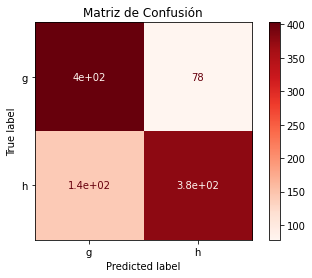

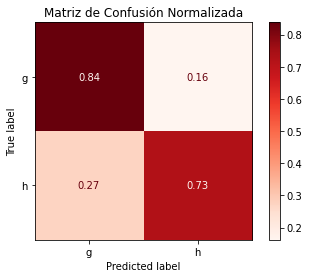

In [ ]:
#Clasificación del conjunto de validación con clasificador SVM lineal con mejor rendmiento:
clasi6=pd.DataFrame(clf.predict(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']]))
validacion['clasificacion']=clasi6
print('Clasificación conjunto de validación')
print(validacion)


#Matrices de confusion:
print('Matrices de Confusión')
matrix=plot_confusion_matrix(clf, validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], validacion['class'],cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de Confusión')

matrixNorm=plot_confusion_matrix(clf, validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], validacion['class'],cmap=plt.cm.Reds,normalize='true')
matrixNorm.ax_.set_title('Matriz de Confusión Normalizada')


**7)** Generar una curva ROC que muestre el desempeño del clasificador y calcular el área bajo la curva. 
Se debe usar las funciones decision_function( ), metrics.roc_curve( ) y metrics.auc( ):

Gráfico de curva ROC


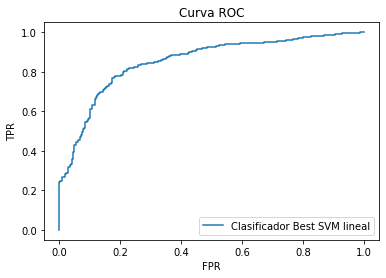

Área bajo la curva: 0.8524789796466097


In [ ]:
#Calculo de "Scores" mediante "decision_function()", y "Trues" (clasificación real del conjunto de validación),  input's para "roc_curve()":
scores=clf.decision_function(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
trues=validacion['class'] #Se usa de aqui en adelante

#Uso de "roc_curves()" para obtener "fpr","tpr":
fpr, tpr, thresholds = metrics.roc_curve(trues, scores, pos_label='h') #Pos_label: indica la etiqueta de la clase positiva

#Gráfico de curva ROC:
print('Gráfico de curva ROC')
plt.plot(fpr,tpr)
plt.legend(["Clasificador Best SVM lineal"], loc ="lower right")
plt.title('Curva ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#Calculo del área bajo la curva:
arearoc=metrics.auc(fpr, tpr)
print('Área bajo la curva: {}'.format(arearoc))

**8)** Generar una curva precisión-recall y calcular el average precision. Se debe usar las funciones
decision_function( ), metrics.precision_recall_curve( ) y metrics.average_precision_score( ):


Gráfico de curva Precision - Recall


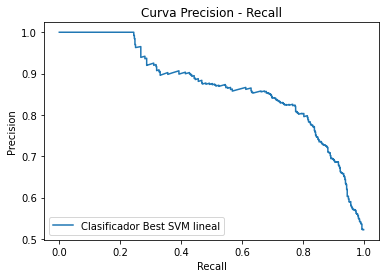

average precision: 0.8674509923072248


In [ ]:
#Función "decision_function()" es usada para obtener "scores":
#Uso de "precision_recall_curve" para obtener "precision","recall":

scores=clf.decision_function(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
precision, recall, thresholds = precision_recall_curve(trues, scores,pos_label='h')

#Grafico de curva Precision - Recall:
print('Gráfico de curva Precision - Recall')
plt.plot(recall,precision)
plt.legend(["Clasificador Best SVM lineal"], loc ="lower left")
plt.title('Curva Precision - Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

#Calculo de average precision:
precisionscore=average_precision_score(trues,scores,pos_label='h')
print('average precision: {}'.format(precisionscore))

**9)** Repetir los pasos (5), (6), (7), (8) para el caso de un SVM con kernel polinomial. Usar dos grados 
distintos del polinomio y 4 valores de C y 4 valores de gamma (parámetro del kernel) para la grilla de 
búsqueda (de parámetros).

**Paso 5:** Entrenar clasificador

In [ ]:
#Modelo a mejorar:
modelp=svm.SVC(kernel='poly', probability=False)
clfp = GridSearchCV(modelp,{'C':[1,0.9,1.1,4],'degree':[2],'gamma':[1,0.5,1.1,0.9]},cv=5)

#Entrenamiento del clasificador:
clfp.fit(x,y) 
dfp=pd.DataFrame(clfp.cv_results_)
print('Tabla Resumen')
print(dfp[['param_C','param_degree','param_gamma','mean_test_score']])
print('Mejor Parametro')
print(clfp.best_params_)

Tabla Resumen
   param_C param_degree param_gamma  mean_test_score
0        1            2           1         0.820000
1        1            2         0.5         0.819000
2        1            2         1.1         0.820667
3        1            2         0.9         0.821667
4      0.9            2           1         0.820667
5      0.9            2         0.5         0.819667
6      0.9            2         1.1         0.820333
7      0.9            2         0.9         0.822333
8      1.1            2           1         0.820667
9      1.1            2         0.5         0.819667
10     1.1            2         1.1         0.820667
11     1.1            2         0.9         0.821000
12       4            2           1         0.822333
13       4            2         0.5         0.820000
14       4            2         1.1         0.822000
15       4            2         0.9         0.821333
Mejor Parametro
{'C': 0.9, 'degree': 2, 'gamma': 0.9}


In [ ]:
#Modelo a mejorar:
modelp2=svm.SVC(kernel='poly', probability=False)
clfp2 = GridSearchCV(modelp2,{'C':[1,0.9,1.1,4],'degree':[3],'gamma':[1,0.5,1.1,0.9]},cv=5) 

#Entrenamiento del clasificador:
clfp2.fit(x,y) 
dfp2=pd.DataFrame(clfp.cv_results_)
print(clfp2.best_params_)

{'C': 1.1, 'degree': 3, 'gamma': 0.5}


In [ ]:
dfp2=pd.DataFrame(clfp2.cv_results_)
print('Tabla Resumen')
print(dfp2[['param_C','param_degree','param_gamma','mean_test_score']])
print('Mejor Parametro')
print(clfp2.best_params_)

Tabla Resumen
   param_C param_degree param_gamma  mean_test_score
0        1            3           1         0.810000
1        1            3         0.5         0.810667
2        1            3         1.1         0.808333
3        1            3         0.9         0.811667
4      0.9            3           1         0.811333
5      0.9            3         0.5         0.811333
6      0.9            3         1.1         0.809667
7      0.9            3         0.9         0.812000
8      1.1            3           1         0.810000
9      1.1            3         0.5         0.812000
10     1.1            3         1.1         0.807667
11     1.1            3         0.9         0.811333
12       4            3           1         0.809667
13       4            3         0.5         0.810667
14       4            3         1.1         0.807000
15       4            3         0.9         0.810667
Mejor Parametro
{'C': 1.1, 'degree': 3, 'gamma': 0.5}


**Paso 6:** Clasificar conjunto de validación y entregar matrices de confusión:

Clasificación conjunto de validación
      fLength    fwidth     fSize  ...     fDist  class  clasificacion
0    0.673909  0.379027  1.657973  ...  2.177018      g              g
1   -0.600515 -0.648184 -0.523849  ...  0.168981      h              h
2   -0.225572 -0.320158 -0.781450  ... -0.733001      h              g
3    0.200104 -0.217506 -0.218714  ...  1.150885      g              g
4   -0.767220 -1.169683 -1.598881  ... -0.393245      g              g
..        ...       ...       ...  ...       ...    ...            ...
995 -0.804530 -0.721609 -1.326957  ...  0.215189      g              g
996 -0.629170 -0.228341 -0.473201  ... -1.395122      g              g
997 -0.662353 -0.652944 -0.757786  ... -0.687261      g              g
998 -0.583490 -0.657530 -1.064167  ... -0.715883      g              g
999  2.628441  1.879461  1.191552  ...  0.785834      h              h

[1000 rows x 12 columns]
Matrices de Confusion


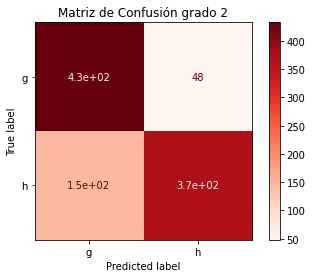

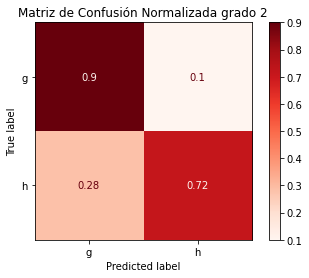

In [ ]:
#Clasificación del conjunto de validación con clasificador SVM polinomial grado 2:
clasi6=pd.DataFrame(clfp.predict(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']]))
validacion['clasificacion']=clasi6
print('Clasificación conjunto de validación')
print(validacion)

#Matrices de confusion:
print('Matrices de Confusion')
matrix=plot_confusion_matrix(clfp, validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], validacion['class'],cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de Confusión grado 2')

matrixNorm=plot_confusion_matrix(clfp, validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], validacion['class'],cmap=plt.cm.Reds,normalize='true')
matrixNorm.ax_.set_title('Matriz de Confusión Normalizada grado 2')
plt.show()

Clasificación conjunto de validación
      fLength    fwidth     fSize  ...     fDist  class  clasificacion
0    0.673909  0.379027  1.657973  ...  2.177018      g              h
1   -0.600515 -0.648184 -0.523849  ...  0.168981      h              h
2   -0.225572 -0.320158 -0.781450  ... -0.733001      h              h
3    0.200104 -0.217506 -0.218714  ...  1.150885      g              g
4   -0.767220 -1.169683 -1.598881  ... -0.393245      g              g
..        ...       ...       ...  ...       ...    ...            ...
995 -0.804530 -0.721609 -1.326957  ...  0.215189      g              g
996 -0.629170 -0.228341 -0.473201  ... -1.395122      g              g
997 -0.662353 -0.652944 -0.757786  ... -0.687261      g              g
998 -0.583490 -0.657530 -1.064167  ... -0.715883      g              g
999  2.628441  1.879461  1.191552  ...  0.785834      h              h

[1000 rows x 12 columns]
Matrices de Confusion


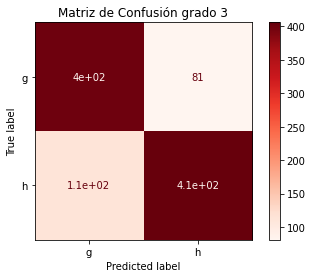

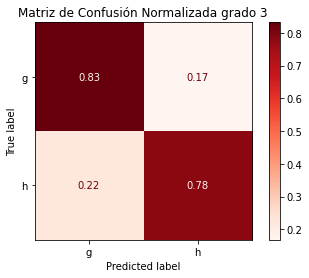

In [ ]:
#Clasificación del conjunto de validación con clasificador SVM polinomial grado 3:
clasi6=pd.DataFrame(clfp2.predict(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']]))
validacion['clasificacion']=clasi6
print('Clasificación conjunto de validación')
print(validacion)

#Matrices de confusion:
print('Matrices de Confusion')
matrix=plot_confusion_matrix(clfp2, validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], validacion['class'],cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de Confusión grado 3')

matrixNorm=plot_confusion_matrix(clfp2, validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], validacion['class'],cmap=plt.cm.Reds,normalize='true')
matrixNorm.ax_.set_title('Matriz de Confusión Normalizada grado 3')
plt.show()

 **Paso 7:** Generar curva ROC y y área bajo la curva:

Grafico de curva ROC


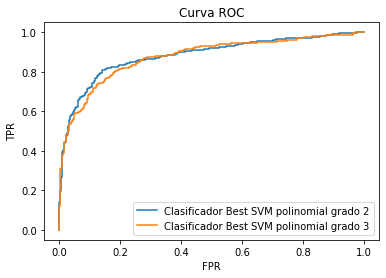

Area bajo la curva grado 2: 0.882506339153738
Area bajo la curva grado 3: 0.8759048065406446


In [ ]:
#Calculo de "Scores" mediante "decision_function()":
scores=clfp.decision_function(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
scores2=clfp2.decision_function(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])


#Uso de "roc_curves()" para obtener "fpr","tpr":
fpr1, tpr1, thresholds1 = metrics.roc_curve(trues, scores, pos_label='h') #Pos_label: indica la etiqueta de la clase positiva
fpr2, tpr2, thresholds2 = metrics.roc_curve(trues, scores2, pos_label='h')
#Grafico de curva ROC:
print('Grafico de curva ROC')
plt.plot(fpr1,tpr1,fpr2,tpr2)
plt.legend(["Clasificador Best SVM polinomial grado 2","Clasificador Best SVM polinomial grado 3"], loc ="lower right")
plt.title('Curva ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#Calculo del area bajo la curva:
arearoc=metrics.auc(fpr1, tpr1)
print('Area bajo la curva grado 2: {}'.format(arearoc))
arearoc2=metrics.auc(fpr2, tpr2)
print('Area bajo la curva grado 3: {}'.format(arearoc2))

**Paso 8:** Generar una curva precisión-recall y calcular el average precision



Grafico de curva Precision - Recall


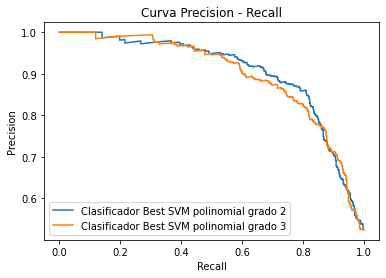

average precision grado 2: 0.9043215025909843
average precision grado 3: 0.8980195885923941


In [ ]:
#Funcion "decision_function()" es usada para obtener "scores".
##Uso de "precision_recall_curve" para obtener "precision","recall":

scores=clfp.decision_function(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
precision1, recall1, thresholds1 = precision_recall_curve(trues, scores,pos_label='h')

scores2=clfp2.decision_function(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
precision2, recall2, thresholds2 = precision_recall_curve(trues, scores2,pos_label='h')

#Grafico de curva Precision - Recall:
print('Grafico de curva Precision - Recall')
plt.plot(recall1,precision1,recall2,precision2)
plt.legend(["Clasificador Best SVM polinomial grado 2","Clasificador Best SVM polinomial grado 3"], loc ="lower left")
plt.title('Curva Precision - Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

#Calculo de average precision:
precisionscore=average_precision_score(trues,scores,pos_label='h')
print('average precision grado 2: {}'.format(precisionscore))
precisionscore=average_precision_score(trues,scores2,pos_label='h')
print('average precision grado 3: {}'.format(precisionscore))

**10)** Repetir los pasos (5), (6), (7), (8) para el caso de un SVM con kernel RBF. Usar 5 valores de C y 4 
valores de gamma (parámetro del kernel) para la grilla de búsqueda (de parámetros):

**Paso 5:** Entrenar clasificador

In [ ]:
#Modelo a mejorar:
modelr=svm.SVC(kernel='rbf', probability=False)
clfr = GridSearchCV(modelr,{'C':[0.6,0.8,1,1.2,2],'gamma':[0.12,0.149,0.15,0.151,0.17]},cv=5) 

#Entrenamiento del clasificador:
clfr.fit(x,y) 
dfr=pd.DataFrame(clfr.cv_results_)
print('Tabla Resumen')
print(dfr[['param_C','param_gamma','mean_test_score']])
print('Mejor Parametro')
print(clfr.best_params_)

Tabla Resumen
   param_C param_gamma  mean_test_score
0      0.6        0.12         0.836333
1      0.6       0.149         0.834667
2      0.6        0.15         0.834667
3      0.6       0.151         0.835000
4      0.6        0.17         0.834667
5      0.8        0.12         0.837000
6      0.8       0.149         0.836000
7      0.8        0.15         0.836000
8      0.8       0.151         0.836000
9      0.8        0.17         0.837333
10       1        0.12         0.836667
11       1       0.149         0.838667
12       1        0.15         0.838667
13       1       0.151         0.838333
14       1        0.17         0.838667
15     1.2        0.12         0.840333
16     1.2       0.149         0.840000
17     1.2        0.15         0.840000
18     1.2       0.151         0.840000
19     1.2        0.17         0.839000
20       2        0.12         0.841667
21       2       0.149         0.841000
22       2        0.15         0.840667
23       2       0.151    

**Paso 6:** Clasificar conjunto de validación y entregar matrices de confusión

Clasificación conjunto de validación
      fLength    fwidth     fSize  ...     fDist  class  clasificacion
0    0.673909  0.379027  1.657973  ...  2.177018      g              g
1   -0.600515 -0.648184 -0.523849  ...  0.168981      h              h
2   -0.225572 -0.320158 -0.781450  ... -0.733001      h              h
3    0.200104 -0.217506 -0.218714  ...  1.150885      g              g
4   -0.767220 -1.169683 -1.598881  ... -0.393245      g              g
..        ...       ...       ...  ...       ...    ...            ...
995 -0.804530 -0.721609 -1.326957  ...  0.215189      g              g
996 -0.629170 -0.228341 -0.473201  ... -1.395122      g              g
997 -0.662353 -0.652944 -0.757786  ... -0.687261      g              g
998 -0.583490 -0.657530 -1.064167  ... -0.715883      g              g
999  2.628441  1.879461  1.191552  ...  0.785834      h              h

[1000 rows x 12 columns]
Matrices de Confusion


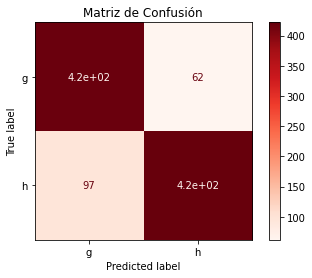

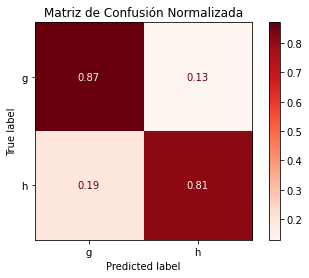

In [ ]:
#Clasificación del conjunto de validación con clasificador SVM polinomial con mejor rendmiento:
clasi6=pd.DataFrame(clfr.predict(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']]))
validacion['clasificacion']=clasi6
print('Clasificación conjunto de validación')
print(validacion)

#Matrices de confusion:
print('Matrices de Confusion')
matrix=plot_confusion_matrix(clfr, validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], validacion['class'],cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de Confusión')

matrixNorm=plot_confusion_matrix(clfr, validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], validacion['class'],cmap=plt.cm.Reds,normalize='true')
matrixNorm.ax_.set_title('Matriz de Confusión Normalizada')
plt.show()

 **Paso 7:** Generar curva ROC y y área bajo la curva

Grafico de curva ROC


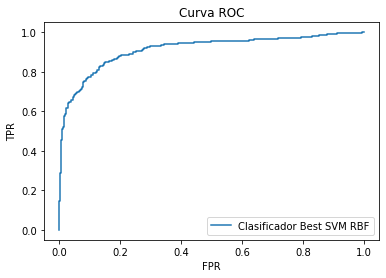

Area bajo la curva: 0.9133588902375029


In [ ]:
#Calculo de "Scores" mediante "decision_function()":
scores=clfr.decision_function(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])


#Uso de "roc_curves()" para obtener "fpr","tpr":
fpr2, tpr2, thresholds2 = metrics.roc_curve(trues, scores, pos_label='h') #Pos_label: indica la etiqueta de la clase positiva

#Grafico de curva ROC:
print('Grafico de curva ROC')
plt.plot(fpr2,tpr2)
plt.legend(["Clasificador Best SVM RBF"], loc ="lower right")
plt.title('Curva ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#Calculo del area bajo la curva:
arearoc=metrics.auc(fpr2, tpr2)
print('Area bajo la curva: {}'.format(arearoc))

**Paso 8:** Generar una curva precisión-recall y calcular el average precision

Grafico de curva Precision - Recall


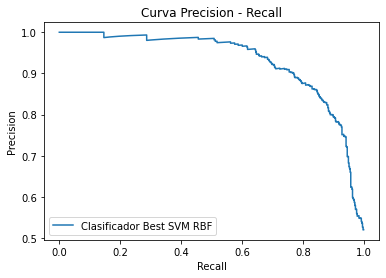

average precision: 0.9300494062039736


In [ ]:
#Funcion "decision_function()" es usada para obtener "scores":
##Uso de "precision_recall_curve" para obtener "precision1","recall1":

scores=clfr.decision_function(validacion[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
precision2, recall2, thresholds2 = precision_recall_curve(trues, scores,pos_label='h')

#Grafico de curva Precision - Recall:
print('Grafico de curva Precision - Recall')
plt.plot(recall2,precision2)
plt.legend(["Clasificador Best SVM RBF"], loc ="lower left")
plt.title('Curva Precision - Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

#Calculo de average precision:
precisionscore=average_precision_score(trues,scores,pos_label='h')
print('average precision: {}'.format(precisionscore))

**11)** Evaluar el mejor clasificador obtenido sobre el conjunto de prueba, reportando las métricas indicadas 
en (6), (7) y (8). Considerar los casos de SVM lineal, SVM con kernel polinomial (2 grados distintos 
de polinomio) y SVM con kernel RBF:

**Paso 6:** Clasificar conjunto de prueba y entregar matrices de confusión

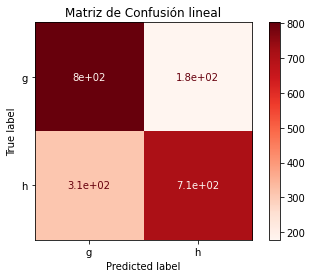

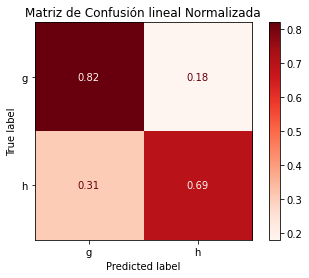

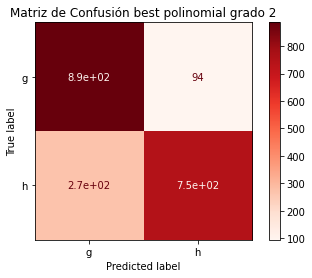

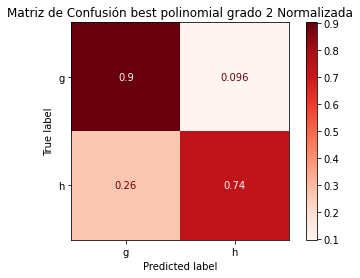

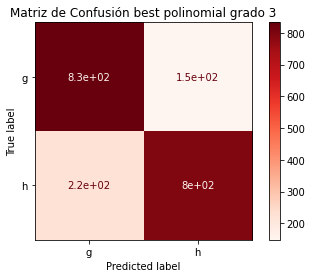

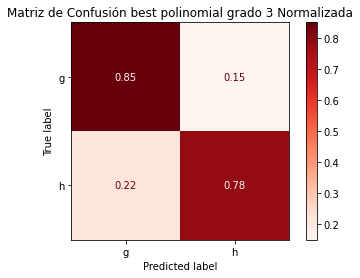

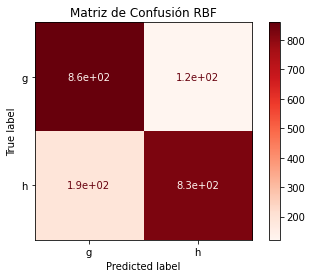

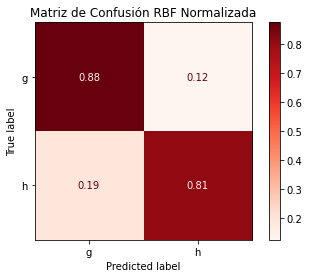

In [ ]:
#Clasificación del conjunto de prueba con clasificadores SVM en esta parte no se printean por espacio.
#Matrices de confusion lineal:
matrix=plot_confusion_matrix(clf, prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], prueba['class'],cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de Confusión lineal')
matrixNorm=plot_confusion_matrix(clf, prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], prueba['class'],cmap=plt.cm.Reds,normalize='true')
matrixNorm.ax_.set_title('Matriz de Confusión lineal Normalizada')

#Matrices de confusion best polinomial:
matrix=plot_confusion_matrix(clfp, prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], prueba['class'],cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de Confusión best polinomial grado 2')
matrixNorm=plot_confusion_matrix(clfp, prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], prueba['class'],cmap=plt.cm.Reds,normalize='true')
matrixNorm.ax_.set_title('Matriz de Confusión best polinomial grado 2 Normalizada')

#Matrices de confusion polinomial:
matrix=plot_confusion_matrix(clfp2, prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], prueba['class'],cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de Confusión best polinomial grado 3')
matrixNorm=plot_confusion_matrix(clfp2, prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], prueba['class'],cmap=plt.cm.Reds,normalize='true')
matrixNorm.ax_.set_title('Matriz de Confusión best polinomial grado 3 Normalizada')

#Matrices de confusion RBF:
matrix=plot_confusion_matrix(clfr, prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], prueba['class'],cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de Confusión RBF')
matrixNorm=plot_confusion_matrix(clfr, prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']], prueba['class'],cmap=plt.cm.Reds,normalize='true')
matrixNorm.ax_.set_title('Matriz de Confusión RBF Normalizada')
plt.show()

**Paso 7:** Curvas ROC

Grafico de curva ROC


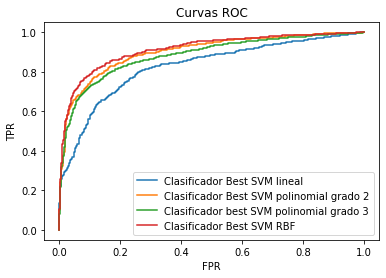

Áreas bajo la curva: Clasificador Best SVM lineal: 0.8265553864945245,Clasificador Best SVM polinomial grado 2: 0.9017105174968163,Clasificador best SVM polinomial grado 3: 0.8834429228951651, Clasificador Best SVM RBF: 0.9138098853686181


In [ ]:
#Calculo de "Scores" mediante "decision_function()":
scores_lineal=clf.decision_function(prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
scores_polinomial1=clfp.decision_function(prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
scores_polinomial2=clfp2.decision_function(prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
scores_rbf=clfr.decision_function(prueba[['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])

#trues:
trues=prueba['class']

#Uso de "roc_curves()" para obtener "fpr","tpr":
fpr1, tpr1, thresholds1 = metrics.roc_curve(trues, scores_lineal, pos_label='h') #Pos_label: indica la etiqueta de la clase positiva
fpr2, tpr2, thresholds2 = metrics.roc_curve(trues, scores_polinomial1, pos_label='h')
fpr3, tpr3, thresholds3 = metrics.roc_curve(trues, scores_polinomial2, pos_label='h')
fpr4, tpr4, thresholds4 = metrics.roc_curve(trues, scores_rbf, pos_label='h')

#Grafico de curva ROC:
print('Grafico de curva ROC')
plt.plot(fpr1,tpr1,fpr2,tpr2,fpr3,tpr3,fpr4,tpr4)
plt.legend(["Clasificador Best SVM lineal","Clasificador Best SVM polinomial grado 2","Clasificador best SVM polinomial grado 3","Clasificador Best SVM RBF"], loc ="lower right")
plt.title('Curvas ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#Calculo del area bajo la curva:
arearoc1=metrics.auc(fpr1, tpr1)
arearoc2=metrics.auc(fpr2, tpr2)
arearoc3=metrics.auc(fpr3, tpr3)
arearoc4=metrics.auc(fpr4, tpr4)
print('Áreas bajo la curva: Clasificador Best SVM lineal: {},Clasificador Best SVM polinomial grado 2: {},Clasificador best SVM polinomial grado 3: {}, Clasificador Best SVM RBF: {}'.format(arearoc1,arearoc2,arearoc3,arearoc4))

**Paso 8:** Generar una curva precisión-recall y calcular el average precision

Graficos de curva Precision - Recall


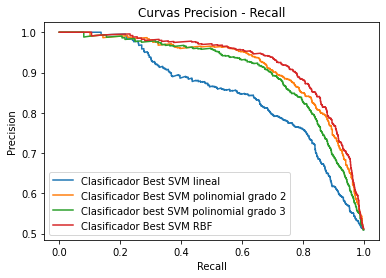

average precision: Clasificador Best SVM lineal: 0.8480014818534003,Clasificador Best SVM polinomial grado 2: 0.9141845487016309,Clasificador best SVM polinomial grado 3: 0.900906960226003, Clasificador Best SVM RBF: 0.9256353323486556


In [ ]:
#Funcion "decision_function()" es usada para obtener "scores" en la parte anterior.
##Uso de "precision_recall_curve" para obtener "precision","recall":

precision1, recall1, thresholds1 = precision_recall_curve(trues, scores_lineal,pos_label='h')
precision2, recall2, thresholds2 = precision_recall_curve(trues, scores_polinomial1,pos_label='h')
precision3, recall3, thresholds3 = precision_recall_curve(trues, scores_polinomial2,pos_label='h')
precision4, recall4, thresholds4 = precision_recall_curve(trues, scores_rbf,pos_label='h')

#Grafico de curva Precision - Recall:
print('Graficos de curva Precision - Recall')
plt.plot(recall1,precision1,recall2,precision2,recall3,precision3,recall4,precision4)
plt.legend(["Clasificador Best SVM lineal","Clasificador Best SVM polinomial grado 2","Clasificador best SVM polinomial grado 3","Clasificador Best SVM RBF"], loc ="lower left")
plt.title('Curvas Precision - Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

#Calculo de average precision:
precisionscore1=average_precision_score(trues,scores_lineal,pos_label='h')
precisionscore2=average_precision_score(trues,scores_polinomial1,pos_label='h')
precisionscore3=average_precision_score(trues,scores_polinomial2,pos_label='h')
precisionscore4=average_precision_score(trues,scores_rbf,pos_label='h')
print('average precision: Clasificador Best SVM lineal: {},Clasificador Best SVM polinomial grado 2: {},Clasificador best SVM polinomial grado 3: {}, Clasificador Best SVM RBF: {}'.format(precisionscore1,precisionscore2,precisionscore3,precisionscore4))

In [ ]:
M={'Clasificador':{},'Área Bajo la Curva':{},'Average precision':{}}
M=pd.DataFrame(M)
M['Clasificador']=['Clasificador Best SVM lineal','Clasificador Best SVM polinomial grado 2','Clasificador best SVM polinomial grado 3','Clasificador Best SVM RBF']
M['Área Bajo la Curva']=[arearoc1,arearoc2,arearoc3,arearoc4]
M['Average precision']=[precisionscore1,precisionscore2,precisionscore3,precisionscore4]
M['Tasa de detección g']=[0.84,0.89,0.84,0.89]
M['Tasa de detección h']=[0.72,0.74,0.78,0.79]

M.head()

,Clasificador,Área Bajo la Curva,Average precision,Tasa de detección g,Tasa de detección h
0,Clasificador Best SVM lineal,0.826555,0.848001,0.84,0.72
1,Clasificador Best SVM polinomial grado 2,0.901711,0.914185,0.89,0.74
2,Clasificador best SVM polinomial grado 3,0.883443,0.900907,0.84,0.78
3,Clasificador Best SVM RBF,0.913810,0.925635,0.89,0.79


A partir de la tabla anterior, se puede observar que el "**Clasificador Best SVM RBF**" posee la mayor área bajo la curva, el mayor Average precision, y las mayores tasas de detección 'g' y 'h'. Por lo mencionado anteriomente, el mejor clasificador es el "**Clasificador Best SVM RBF**".

# **Conclusiones:**

En esta tarea se aprendio a separar el Dataset en los conjuntos de entrenamiento, validación y de prueba comprendiendo la función de cada uno de ellos:

**Conjunto de entrenamiento**: Sirve para entrenar el clasificador y  obtener los mejores parámetros de este.

**Conjunto de validación**: Se usa para obtener el desempeño preliminar del clasificador mediante curvas ROC, curvas precisión-recall y matrices de confusión.

**Conjunto de prueba**:  Este conjunto permite evaluar el desempeño final del clasificador al compararlo con otros clasificadores. En este caso para comparar el clasificador lineal, polinomial y RBF.

También, se aprendio a normalizar el dataset y  entrenar a los distintos clasificadores SVM utilizando la librería de Python “Scikit-learn”.

Por otro lado, se reafirmaron los conocimientos en cuanto a métricas para medir el desempeño de un clasificador, es decir, curvas ROC, curvas precisión-recall y matrices de confusión.

Se observo a partir del desempeño de estos clasificadores, que un clasificador RBF tiende a tener mejor desempeño que un polinomial y un polinomial mejor desempeño que uno lineal. Esto se asocia a que en la medida que se aumenta más la dimensión, el conjunto de datos tiende a ser “más separable linealmente" mediante un hiperplano. 

Otro punto a tener en consideración son los tiempos de entrenamiento,el clasificador lineal fue el más rapido para entrenar y el más lento fue el clasificador polinomial.Y en la medida que el grado del polinomio aumenta, el tiempo de entrenamiento aumenta exponencialmente.

En cuanto dificultades, la mayor fue encontrar en primera instancia el orden de los parámetros (decimales, unidades, centenas etc.) y luego encontrar el parámetro óptimo iterando sobre los mejores parámetros en cada entrenamiento.

Finalmente, en este caso no hay modo de mejorar el desempeño de los algoritmos, ya que se utilizo una librería en donde los códigos de programación esta predefinidos.

  

In [ ]:
!pwd

/content


In [ ]:
%cd /content/My Drive/

[Errno 2] No such file or directory: '/content/My Drive/'
/content


In [ ]:
%cd /content/drive/My Drive/Colab 

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab'
/content


In [ ]:
!jupyter nbconvert --to pdf tarea2Inteligenciacomputacional.ipynb

[NbConvertApp] WARNING | pattern u'tarea2Inteligenciacomputacional.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'